In [1]:
### Scraping World O Meter that contains information about all countries in the world

In [2]:
# Loading all necessary libraries

library(tidyverse) # loading this library so it allows us to tidy up and graph our data findings
library(magrittr) # loading this library so it allows us to use the pipe operator.
library(purrr) # loading this library so it allows us to create and work with functions
library(glue) # loading this library so it allows us to concatenate variable when it is specified.
library(stringr) # loading this library so it allows us to utilise string manipulations.
library(rvest) # loading this library so it allows us to use functions for web scraping.
library(polite) # loading this library so it allows us to use various functions responsible web scraping.
library(jsonlite) # loading this library so it allows us to use functions when dealing with files in a JSON format\

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [3]:
# URL that contains information about all countries in the world
url <- "https://www.worldometers.info/gdp/gdp-by-country/"

In [4]:
# checking if we are allowed to scrape the site
session <- url %>% 
    bow()
session

<polite session> https://www.worldometers.info/gdp/gdp-by-country/
    User-agent: polite R package
    robots.txt: 1 rules are defined for 1 bots
   Crawl delay: 5 sec
  The path is scrapable for this user-agent

In [5]:
# reading out then printing out the content of the page
world_data <- url %>% 
  read_html()
world_data

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<!-- Google tag (gtag.js) --><script async src="https://www.googl ...

In [6]:
# scraping all the countries names
countries <- world_data %>%
     html_nodes("#example2 a") %>%
     html_text() 
countries

[1] "United States"            "China"                   
  [3] "Japan"                    "Germany"                 
  [5] "India"                    "United Kingdom"          
  [7] "France"                   "Russia"                  
  [9] "Canada"                   "Italy"                   
 [11] "Brazil"                   "Australia"               
 [13] "South Korea"              "Mexico"                  
 [15] "Spain"                    "Indonesia"               
 [17] "Saudi Arabia"             "Netherlands"             
 [19] "Turkey"                   "Switzerland"             
 [21] "Poland"                   "Argentina"               
 [23] "Sweden"                   "Norway"                  
 [25] "Belgium"                  "Ireland"                 
 [27] "Israel"                   "United Arab Emirates"    
 [29] "Thailand"                 "Nigeria"                 
 [31] "Egypt"                    "Austria"                 
 [33] "Singapore"                "Bangladesh"              
 [35] "Vietnam"                  "Malaysia"                
 [37] "South Africa"             "Philippines"             
 [39] "Denmark"                  "Iran"                    
 [41] "Pakistan"                 "Hong Kong"               
 [43] "Colombia"                 "Romania"                 
 [45] "Chile"                    "Czech Republic (Czechia)"
 [47] "Finland"                  "Iraq"                    
 [49] "Portugal"                 "New Zealand"             
 [51] "Peru"                     "Qatar"                   
 [53] "Kazakhstan"               "Greece"                  
 [55] "Algeria"                  "Kuwait"                  
 [57] "Hungary"                  "Ukraine"                 
 [59] "Morocco"                  "Ethiopia"                
 [61] "Slovakia"                 "Ecuador"                 
 [63] "Oman"                     "Dominican Republic"      
 [65] "Kenya"                    "Angola"                  
 [67] "Guatemala"                "Bulgaria"                
 [69] "Luxembourg"               "Uzbekistan"              
 [71] "Azerbaijan"               "Panama"                  
 [73] "Tanzania"                 "Sri Lanka"               
 [75] "Ghana"                    "Belarus"                 
 [77] "Uruguay"                  "Croatia"                 
 [79] "Lithuania"                "Côte d'Ivoire"           
 [81] "Costa Rica"               "Serbia"                  
 [83] "Slovenia"                 "Myanmar"                 
 [85] "DR Congo"                 "Sudan"                   
 [87] "Jordan"                   "Tunisia"                 
 [89] "Libya"                    "Uganda"                  
 [91] "Bahrain"                  "Cameroon"                
 [93] "Bolivia"                  "Paraguay"                
 [95] "Latvia"                   "Nepal"                   
 [97] "Estonia"                  "El Salvador"             
 [99] "Honduras"                 "Papua New Guinea"        
[101] "Cambodia"                 "Zambia"                  
[103] "Cyprus"                   "Trinidad and Tobago"     
[105] "Iceland"                  "Senegal"                 
[107] "Georgia"                  "Bosnia and Herzegovina"  
[109] "Macao"                    "Guinea"                  
[111] "Gabon"                    "Zimbabwe"                
[113] "Botswana"                 "Haiti"                   
[115] "Armenia"                  "State of Palestine"      
[117] "Burkina Faso"             "Albania"                 
[119] "Mali"                     "Mozambique"              
[121] "Malta"                    "Benin"                   
[123] "Jamaica"                  "Mongolia"                
[125] "Brunei "                  "Laos"                    
[127] "Nicaragua"                "Guyana"                  
[129] "Madagascar"               "Congo"                   
[131] "Moldova"                  "Niger"                   
[133] "North Macedonia"          "Rwanda" 

In [7]:
# scraping all the population numbers

population <- world_data %>%
     html_nodes("td:nth-child(6)") %>%
     html_text() 
population

[1] "338,289,857"   "1,425,887,337" "123,951,692"   "83,369,843"   
  [5] "1,417,173,173" "67,508,936"    "64,626,628"    "144,713,314"  
  [9] "38,454,327"    "59,037,474"    "215,313,498"   "26,177,413"   
 [13] "51,815,810"    "127,504,125"   "47,558,630"    "275,501,339"  
 [17] "36,408,820"    "17,564,014"    "85,341,241"    "8,740,472"    
 [21] "39,857,145"    "45,510,318"    "10,549,347"    "5,434,319"    
 [25] "11,655,930"    "5,023,109"     "9,038,309"     "9,441,129"    
 [29] "71,697,030"    "218,541,212"   "110,990,103"   "8,939,617"    
 [33] "5,975,689"     "171,186,372"   "98,186,856"    "33,938,221"   
 [37] "59,893,885"    "115,559,009"   "5,882,261"     "88,550,570"   
 [41] "235,824,862"   "7,488,865"     "51,874,024"    "19,659,267"   
 [45] "19,603,733"    "10,493,986"    "5,540,745"     "44,496,122"   
 [49] "10,270,865"    "5,185,288"     "34,049,588"    "2,695,122"    
 [53] "19,397,998"    "10,384,971"    "44,903,225"    "4,268,873"    
 [57] "9,967,308"     "39,701,739"    "37,457,971"    "123,379,924"  
 [61] "5,643,453"     "18,001,000"    "4,576,298"     "11,228,821"   
 [65] "54,027,487"    "35,588,987"    "17,843,908"    "6,781,953"    
 [69] "647,599"       "34,627,652"    "10,358,074"    "4,408,581"    
 [73] "65,497,748"    "21,832,143"    "33,475,870"    "9,534,954"    
 [77] "3,422,794"     "4,030,358"     "2,750,055"     "28,160,542"   
 [81] "5,180,829"     "7,221,365"     "2,119,844"     "54,179,306"   
 [85] "99,010,212"    "46,874,204"    "11,285,869"    "12,356,117"   
 [89] "6,812,341"     "47,249,585"    "1,472,233"     "27,914,536"   
 [93] "12,224,110"    "6,780,744"     "1,850,651"     "30,547,580"   
 [97] "1,326,062"     "6,336,392"     "10,432,860"    "10,142,619"   
[101] "16,767,842"    "20,017,675"    "1,251,488"     "1,531,044"    
[105] "372,899"       "17,316,449"    "3,744,385"     "3,233,526"    
[109] "695,168"       "13,859,341"    "2,388,992"     "16,320,537"   
[113] "2,630,296"     "11,584,996"    "2,780,469"     "5,250,072"    
[117] "22,673,762"    "2,842,321"     "22,593,590"    "32,969,518"   
[121] "533,286"       "13,352,864"    "2,827,377"     "3,398,366"    
[125] "449,002"       "7,529,475"     "6,948,392"     "808,726"      
[129] "29,611,714"    "5,970,424"     "3,272,996"     "26,207,977"   
[133] "2,093,599"     "13,776,698"    "20,405,317"    "1,299,469"    
[137] "409,984"       "17,723,315"    "2,567,012"     "1,674,908"    
[141] "6,630,623"     "9,952,787"     "4,736,139"     "8,848,699"    
[145] "523,787"       "627,082"       "281,635"       "929,766"      
[149] "1,201,670"     "5,302,681"     "8,605,718"     "618,040"      
[153] "79,824"        "1,341,296"     "12,889,576"    "405,272"      
[157] "2,305,825"     "5,579,144"     "593,149"       "2,705,992"    
[161] "179,857"       "93,763"        "2,105,566"     "724,273"      
[165] "107,118"       "125,438"       "836,774"       "326,740"      
[169] "47,657"        "103,948"       "222,382"       "72,737"       
[173] "227,380"       "539,013"       "41,569"        "131,232"      
[177] "11,312"

In [8]:
# scraping all the countries GDP per capita

gdp_per_capita <- world_data %>%
     html_nodes("td:nth-child(7)") %>%
     html_text() 
gdp_per_capita

[1] "$75,269"  "$12,598"  "$34,135"  "$48,845"  "$2,389"   "$45,485" 
  [7] "$43,061"  "$15,482"  "$55,646"  "$34,053"  "$8,918"   "$64,003" 
 [13] "$32,138"  "$11,091"  "$29,385"  "$4,788"   "$30,436"  "$56,429" 
 [19] "$10,616"  "$92,410"  "$17,266"  "$13,904"  "$55,543"  "$106,594"
 [25] "$49,640"  "$105,362" "$57,758"  "$53,758"  "$6,909"   "$2,184"  
 [31] "$4,295"   "$52,732"  "$78,115"  "$2,688"   "$4,164"   "$11,972" 
 [37] "$6,776"   "$3,499"   "$67,220"  "$4,388"   "$1,597"   "$48,050" 
 [43] "$6,630"   "$15,324"  "$15,355"  "$27,723"  "$50,684"  "$5,937"  
 [49] "$24,530"  "$47,680"  "$7,126"   "$88,046"  "$11,373"  "$21,095" 
 [55] "$4,274"   "$43,233"  "$17,938"  "$4,043"   "$3,582"   "$1,028"  
 [61] "$20,461"  "$6,391"   "$25,057"  "$10,121"  "$2,099"   "$2,999"  
 [67] "$5,324"   "$13,129"  "$127,046" "$2,322"   "$7,600"   "$17,358" 
 [73] "$1,156"   "$3,408"   "$2,176"   "$7,634"   "$20,795"  "$17,608" 
 [79] "$25,576"  "$2,486"   "$13,199"  "$8,794"   "$29,303"  "$1,096"  
 [85] "$586"     "$1,102"   "$4,205"   "$3,777"   "$6,716"   "$964"    
 [91] "$30,152"  "$1,588"   "$3,523"   "$6,153"   "$22,238"  "$1,337"  
 [97] "$28,732"  "$5,127"   "$3,040"   "$3,020"   "$1,787"   "$1,488"  
[103] "$22,724"  "$18,222"  "$74,663"  "$1,599"   "$6,571"   "$7,585"  
[109] "$31,618"  "$1,532"   "$8,820"   "$1,267"   "$7,738"   "$1,748"  
[115] "$7,014"   "$3,640"   "$833"     "$6,643"   "$833"     "$541"    
[121] "$33,313"  "$1,303"   "$6,047"   "$4,947"   "$37,152"  "$2,088"  
[127] "$2,255"   "$18,990"  "$505"     "$2,448"   "$4,406"   "$533"    
[133] "$6,478"   "$966"     "$645"     "$9,926"   "$31,458"  "$717"    
[139] "$4,911"   "$7,053"   "$1,649"   "$1,054"   "$2,191"   "$918"    
[145] "$11,818"  "$9,721"   "$20,019"  "$5,317"   "$4,040"   "$755"    
[151] "$461"     "$5,858"   "$41,993"  "$2,358"   "$238"     "$6,968"  
[157] "$1,107"   "$427"     "$3,903"   "$840"     "$11,481"  "$18,745" 
[163] "$776"     "$2,203"   "$14,829"  "$10,016"  "$1,485"   "$3,010"  
[169] "$20,177"  "$9,125"   "$3,743"   "$8,415"   "$2,404"   "$792"    
[175] "$6,728"   "$1,702"   "$5,335"

In [9]:
scrape_and_filter <- function(url) {
  # Scrape data
  webpage <- read_html(url)
  
  countries <- webpage %>%
    html_nodes('#example2 a') %>%
    html_text()
  
  population <- webpage %>%
    html_nodes('td:nth-child(6)') %>%
    html_text() %>%
    gsub("[^0-9.]", "", .) %>%
    as.numeric()
  
  gdp_per_capita <- webpage %>%
    html_nodes('td:nth-child(7)') %>%
    html_text() %>%
    gsub("[^0-9.]", "", .) %>%
    as.numeric()

  # Convert to data frame
  data <- data.frame(
    Country = countries,
    Population = population,
    GDP_per_Capita = gdp_per_capita
  )
  
  # Filter for the required countries
  filtered_data <- data %>%
    filter(Country %in% c('United Kingdom', 'Japan', 'New Zealand', 'Greece', 'Belgium', 'Netherlands', 'United States', 'Spain', 'Thailand', 'Australia'))
  
  return(filtered_data)
}

# Call the function
url <- "https://www.worldometers.info/gdp/gdp-by-country/"
result <- scrape_and_filter(url)
print(result)

          Country Population GDP_per_Capita
1   United States  338289857          75269
2           Japan  123951692          34135
3  United Kingdom   67508936          45485
4       Australia   26177413          64003
5           Spain   47558630          29385
6     Netherlands   17564014          56429
7         Belgium   11655930          49640
8        Thailand   71697030           6909
9     New Zealand    5185288          47680
10         Greece   10384971          21095


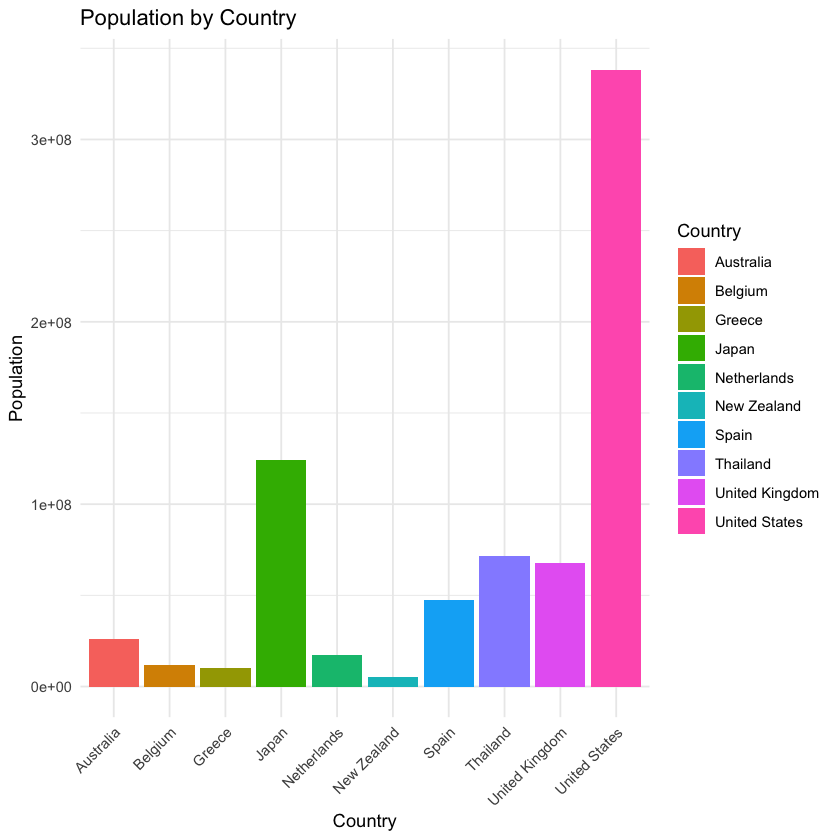

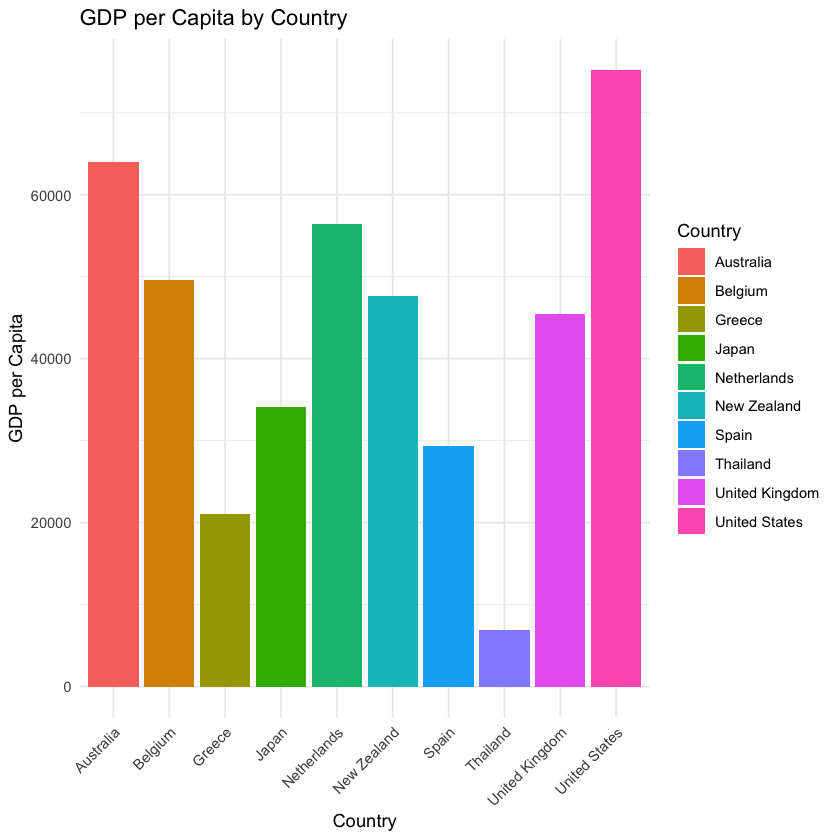

In [10]:
p1 <- ggplot(result, aes(x=Country, y=Population, fill=Country)) +
  geom_bar(stat="identity") +
  labs(title="Population by Country", y="Population") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels

p2 <- ggplot(result, aes(x=Country, y=GDP_per_Capita, fill=Country)) +
  geom_bar(stat="identity") +
  labs(title="GDP per Capita by Country", y="GDP per Capita") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels

print(p1)
print(p2)